In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.spatial import ConvexHull, distance_matrix

from ipa.GenerateReferencePoints import get_hull_equations, numba_random_gen
import seaborn as sns

In [11]:
inner_sq = np.random.rand(5000,2) - 0.5

outer_sq = np.random.rand(10000,2) * 4 - 2
outer_sq_mask = np.logical_or(outer_sq[:,0] > 0.5, outer_sq[:,0] < -0.5)
outer_sq_mask = np.logical_or(outer_sq_mask, outer_sq[:,1] > 0.5)
outer_sq_mask = np.logical_or(outer_sq_mask, outer_sq[:,1] < -0.5)
outer_sq = outer_sq[outer_sq_mask]

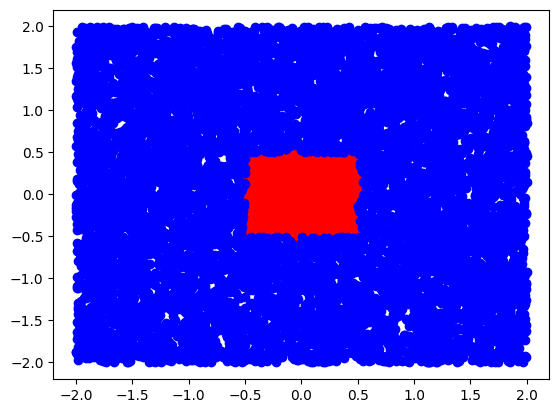

In [12]:
# plot the points
plt.scatter(inner_sq[:,0], inner_sq[:,1], c='r')
plt.scatter(outer_sq[:,0], outer_sq[:,1], c='b')

In [21]:
dist = distance_matrix(outer_sq, inner_sq, p=np.inf)
sum_dist = np.sum(dist, axis=1)
sum_dist.shape

(9383,)

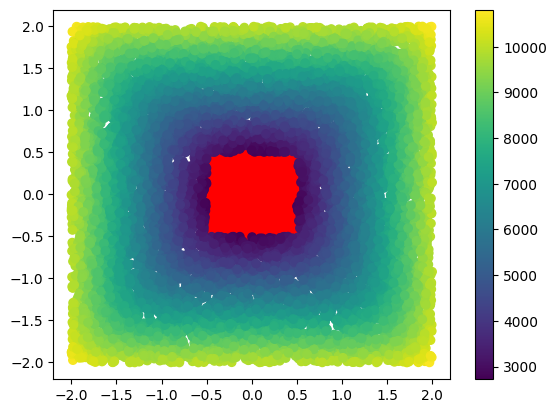

In [22]:
# plot the points with distance as heatmap
plt.scatter(inner_sq[:,0], inner_sq[:,1], c='r')
#plt.scatter(outer_sq[:,0], outer_sq[:,1], c='b')
plt.scatter(outer_sq[:,0], outer_sq[:,1], c=sum_dist)
plt.colorbar()

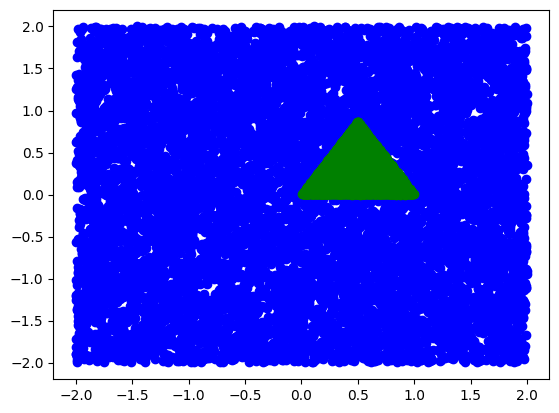

In [74]:
# create random points in an equilateral triangle
triangle = np.array([[0,0], [1,0], [0.5, np.sqrt(3)/2]])

hull = ConvexHull(triangle)
A, b = get_hull_equations(hull)

triangle_points_10000 = numba_random_gen(10000, bounding_box=np.array([[-0.5, -0.5], [1.5, 1.5]]), A=A, b=b)
triangle_points_1000 = numba_random_gen(1000, bounding_box=np.array([[-0.5, -0.5], [1.5, 1.5]]), A=A, b=b)
triangle_points_100 = numba_random_gen(100, bounding_box=np.array([[-0.5, -0.5], [1.5, 1.5]]), A=A, b=b)

outer_sq = np.random.rand(10000,2) * 4 - 2

plt.scatter(outer_sq[:,0], outer_sq[:,1], c='b')
plt.scatter(triangle_points_10000[:,0], triangle_points_10000[:,1], c='g')



In [88]:
dist_10000 = np.min(distance_matrix(outer_sq, triangle_points_10000, p=2), axis=1)
dist_1000 = np.min(distance_matrix(outer_sq, triangle_points_1000, p=2), axis=1)
dist_100 = np.min(distance_matrix(outer_sq, triangle_points_100, p=2), axis=1)

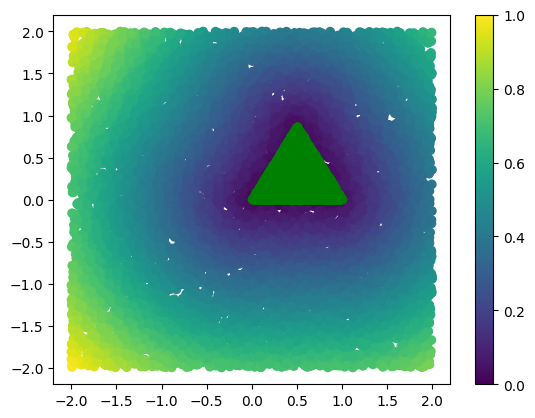

In [91]:
# plot the points with distance as heatmap

plt.scatter(outer_sq[:,0], outer_sq[:,1], c=dist_100)
plt.scatter(triangle_points_10000[:,0], triangle_points_10000[:,1], c='g')
#plt.scatter(outer_sq[:,0], outer_sq[:,1], c='b')
plt.colorbar()

In [77]:
hull_dist = lambda x, A, b: np.max(x @ A  + b)

In [78]:
outer_sq[1] @ A * (outer_sq[1] @ A).T + b

array([0.94139115, 0.00260815, 0.17707572])

In [79]:
dist = list(map(lambda x: hull_dist(x, A, b), outer_sq))

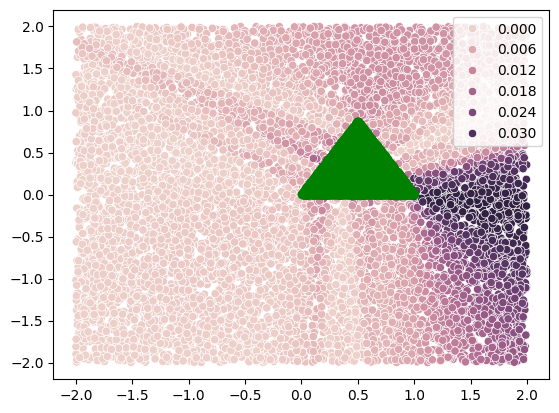

In [100]:
# plot the points with distance as heatmap
dist_error_100 = np.abs((dist_10000 - np.min(dist_10000)) / (np.max(dist_10000) - np.min(dist_10000)) - (dist_100 - np.min(dist_100)) / (np.max(dist_100) - np.min(dist_100)))
dist_error_1000 = np.abs((dist_10000 - np.min(dist_10000)) / (np.max(dist_10000) - np.min(dist_10000)) - (dist_1000 - np.min(dist_1000)) / (np.max(dist_1000) - np.min(dist_1000)))
sns.scatterplot(x=outer_sq[:,0], y=outer_sq[:,1], hue=dist_error_100)
plt.scatter(triangle_points_10000[:,0], triangle_points_10000[:,1], c='g')

In [93]:
dist_error_100.max()

0.034801342121341824

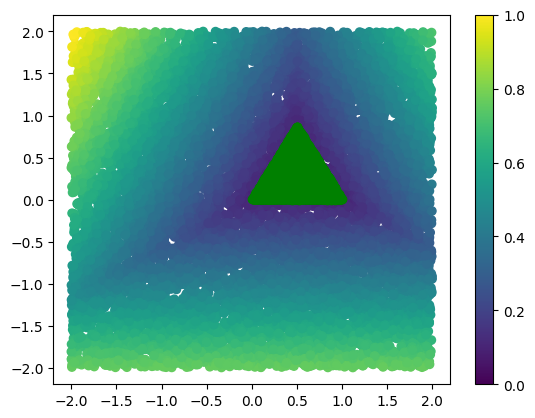

In [85]:
plt.scatter(outer_sq[:,0], outer_sq[:,1], c=dist)
plt.scatter(triangle_points_10000[:,0], triangle_points_10000[:,1], c='g')
#plt.scatter(outer_sq[:,0], outer_sq[:,1], c='b')
plt.colorbar()

In [86]:
dist

[2.255929020771201,
 0.9702531351901551,
 1.707949105519364,
 1.50790789638053,
 1.3205981000067815,
 0.16401196876090918,
 0.6147026674092064,
 1.6847851712349091,
 0.9474024626395168,
 0.0013984180813277902,
 1.61561508308364,
 0.7623603942365371,
 1.5378012466573914,
 1.4388869455712947,
 1.7326305340259895,
 1.1752972645527717,
 1.7257967709570416,
 0.504670955716213,
 0.12664476199188845,
 1.9770314784438128,
 0.3444490565138698,
 1.572423679758073,
 1.0949024081660865,
 0.732656818087412,
 0.02381134250389172,
 1.8256080089763091,
 1.8644148221007426,
 1.5317519031920366,
 1.269102001964593,
 0.38232514569983705,
 0.41711999934955446,
 1.1673046812658558,
 0.9396917667030447,
 0.9014203228227369,
 0.6156965875133615,
 1.4208216437820715,
 1.1734138769687696,
 1.4719657683421374,
 1.1385201189610967,
 1.4060309064426857,
 0.6274332437585057,
 0.5477879707379485,
 0.19079602414742158,
 0.44575736323384296,
 0.631381567436885,
 1.1442844933971892,
 1.690997013862804,
 1.748200746671